In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#absolutePath = input('Enter the path location: ')
absolutePath = r'C:\Users\gulce\Desktop\EEE 8TH SEMESTER\CS 464\Homeworks\HW2\afhq_dog'
imgCount = 0
X = np.empty((len(os.listdir(absolutePath)), 4096, 3))
for fileName in os.listdir(absolutePath):
    imagePath = os.path.join(absolutePath, fileName)
    image = np.array(Image.open(imagePath).resize((64, 64), Image.Resampling.BILINEAR))
    X[imgCount] = image.flatten().reshape((4096, 3))
    imgCount += 1
X0 = X[:, :, 0]  # red
X1 = X[:, :, 1]  # green
X2 = X[:, :, 2]  # blue

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\gulce\\Desktop\\EEE 8TH SEMESTER\\CS 464\\Homeworks\\HW2\\afhq_do'

In [5]:
class PCA:
    def __init__(self):
        self.numPC = None
        self.eigenValues = None
        self.eigenVectors = None

    def getEigen(self, X):
        normalized = X - X.mean(axis=0, keepdims=True)
        covariance = np.cov(normalized, rowvar=False)
        self.eigenValues, self.eigenVectors = np.linalg.eig(covariance)
        eigenIndices = np.argsort(-self.eigenValues)
        self.eigenVectors = self.eigenVectors.T
        self.eigenValues = self.eigenValues[eigenIndices]
        self.eigenVectors = self.eigenVectors[eigenIndices]

    def getkLargestPCs(self, k):
        self.numPC = k
        largestEigenValues = self.eigenValues[:self.numPC]
        largestEigenVectors = self.eigenVectors[:self.numPC]
        return largestEigenValues, largestEigenVectors

    def getPVE(self, largestEigenValues):
        listPVE = []
        for e in largestEigenValues:
            listPVE.append(e/np.sum(self.eigenValues))
        return listPVE

    def getNormalizedPCs(self, largestEigenVectors):
        X_PCs = np.reshape(largestEigenVectors, (self.numPC, 64, 64))
        normalizedX_PCs = (X_PCs - X_PCs.min()) / (X_PCs.max() - X_PCs.min())
        return normalizedX_PCs

In [6]:
pca_X0 = PCA()
pca_X1 = PCA()
pca_X2 = PCA()

In [7]:
pca_X0.getEigen(X0)
eigenValuesL_X0, eigenVectorsL_X0 = pca_X0.getkLargestPCs(10)
listPVE_X0 = pca_X0.getPVE(eigenValuesL_X0)
print(listPVE_X0)

[0.2150681068731376, 0.13542095903812387, 0.07504082393012268, 0.05172646440945583, 0.042285900646601336, 0.024580425792268025, 0.021770322002457664, 0.01989656951031639, 0.017069749419479512, 0.01655849356363037]


In [8]:
pca_X1.getEigen(X1)
eigenValuesL_X1, eigenVectorsL_X1 = pca_X1.getkLargestPCs(10)
listPVE_X1 = pca_X1.getPVE(eigenValuesL_X1)
print(listPVE_X1)

[0.20045373100504213, 0.1376758814315232, 0.07695187885576904, 0.053969649951490825, 0.04291814352919716, 0.026021557702841355, 0.02142609389411918, 0.020812494401400036, 0.01739320386410746, 0.016811114431734355]


In [9]:
pca_X2.getEigen(X2)
eigenValuesL_X2, eigenVectorsL_X2 = pca_X2.getkLargestPCs(10)
listPVE_X2 = pca_X2.getPVE(eigenValuesL_X2)
print(listPVE_X2)

[0.22994562131595436, 0.13677010354278882, 0.07033232471231898, 0.05355895002957549, 0.03981729858197311, 0.023730579789657077, 0.02098964613416302, 0.02075654086553709, 0.016680265709240957, 0.016291470910426934]


In [10]:
normalizedX0_PCs = pca_X0.getNormalizedPCs(eigenVectorsL_X0)
normalizedX1_PCs = pca_X1.getNormalizedPCs(eigenVectorsL_X1)
normalizedX2_PCs = pca_X2.getNormalizedPCs(eigenVectorsL_X2)
normalized_PCs = np.stack((normalizedX0_PCs, normalizedX1_PCs, normalizedX2_PCs), axis=3)
print(normalized_PCs.shape)

(10, 64, 64, 3)


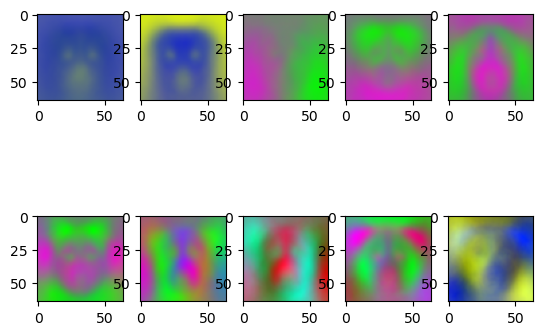

In [11]:
fig, axs = plt.subplots(2, 5)
for i in range(0, 5):
    axs[0, i].imshow(normalized_PCs[i])
for i in range(0, 5):
    axs[1, i].imshow(normalized_PCs[i + 5])

In [32]:
def perform(k, originalImg):
    eigenValuesL_X0, eigenVectorsL_X0 = pca_X0.getkLargestPCs(k)
    eigenValuesL_X1, eigenVectorsL_X1 = pca_X1.getkLargestPCs(k)
    eigenValuesL_X2, eigenVectorsL_X2 = pca_X2.getkLargestPCs(k)

    originalImgX0 = originalImg[:, 0]
    originalImgX1 = originalImg[:, 1]
    originalImgX2 = originalImg[:, 2]

    nOriginalImgX0 = originalImgX0 - originalImgX0.mean(axis=0, keepdims=True)
    nOriginalImgX1 = originalImgX1 - originalImgX1.mean(axis=0, keepdims=True)
    nOriginalImgX2 = originalImgX2 - originalImgX2.mean(axis=0, keepdims=True)

    dotProduct_X0 = (np.dot(np.dot(eigenVectorsL_X0, nOriginalImgX0), eigenVectorsL_X0)
                     + originalImgX0.mean(axis=0, keepdims=True)).reshape((64, 64))
    dotProduct_X1 = (np.dot(np.dot(eigenVectorsL_X1, nOriginalImgX1), eigenVectorsL_X1)
                     + originalImgX1.mean(axis=0, keepdims=True)).reshape((64, 64))
    dotProduct_X2 = (np.dot(np.dot(eigenVectorsL_X2, nOriginalImgX2), eigenVectorsL_X2)
                     + originalImgX2.mean(axis=0, keepdims=True)).reshape((64, 64))

    dotProduct = np.stack((dotProduct_X0, dotProduct_X1, dotProduct_X2), axis=2)
    return dotProduct

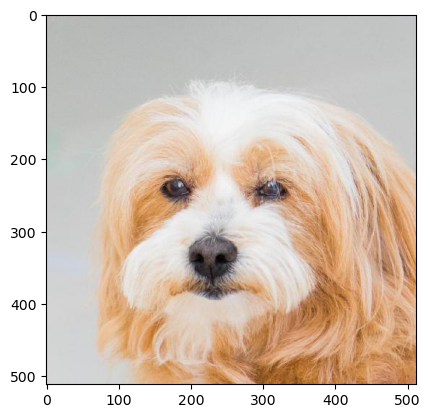

In [33]:
imgPath = r'C:\Users\gulce\Desktop\EEE 8TH SEMESTER\CS 464\Homeworks\HW2\afhq_dog\flickr_dog_000002.jpg'
originalImage = Image.open(imgPath)
originalImg = np.array(originalImage.resize((64, 64), Image.Resampling.BILINEAR)).flatten().reshape((4096, 3))
plt.figure()
plt.imshow(originalImage)

In [34]:
k_list = [1, 50, 250, 500, 1000, 4096]

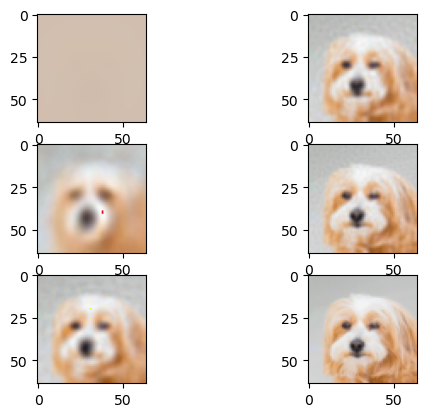

In [37]:
fig, axs = plt.subplots(3, 2)
r = 0
c = 0
for k in k_list:
    reconstructedImage = perform(k, originalImg)
    axs[r, c].imshow(reconstructedImage.astype('uint8'))
    r += 1
    if r == 3:
        r = 0
        c = 1
plt.show()